In [1]:
# アヤメデータを用意する
import torch
from torch.autograd import Variable as V
from sklearn.datasets import load_iris


# 二クラス問題にするため100までしか取り込まない
iris = load_iris()
X = iris.data[:100]
y = iris.target[:100]
X = V(torch.Tensor(X))
y = V(torch.Tensor(y))
print(X.size())
print(y.size())

torch.Size([100, 4])
torch.Size([100])


In [2]:
from torch import nn
from torch import optim


# アヤメデータの入力(4, 1)のモデル
net = nn.Linear(4, 1)
# 二値問題の分類問題の損失関数にはシグモイド関数を作用させたクロスエントロピーを使う
# シグモイド関数を作用させたクロスエントロピー
loss_fn = nn.BCEWithLogitsLoss()
# 勾配計算は確率的最小勾配法
optimizer = optim.SGD(net.parameters(), lr=0.25)

In [3]:
losses = []
for epoc in range(1000):
    optimizer.zero_grad()
    y_pred = net(X)
    loss = loss_fn(y_pred, y.view(100, 1))
    loss.backward()
    optimizer.step()
    losses.append(loss.data[0])

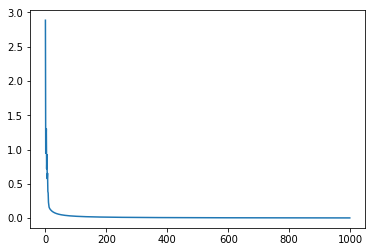

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt


plt.plot(losses)

In [5]:
# 線型結合の結果
h = net(X)
# シグモイドを作用させた確率
prob = nn.functional.sigmoid(h)
# 確率として、0付近の値と1付近の値に固まってるはずなので、0.5以上でマスクする
y_pred = prob > 0.5
# マスクした結果が真の値と同じになる
(y.byte().view(100, 1) == y_pred).sum()

Variable containing:
 100
[torch.ByteTensor of size 1]

In [6]:
from sklearn.datasets import load_digits


# 多クラス問題
digits = load_digits()
X = digits.data
y = digits.target
X = V(torch.Tensor(X))
# CrossEntropyLoss()はLongTensorを返すので計算の型を合わせる
y = V(torch.LongTensor(y))
net = nn.Linear(X.size()[1], 10)
# 多クラスの分類問題にはソフトマックスクロスエントロピーを損失関数に使う
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

In [7]:
losses = []
for epoc in range(1000):
    optimizer.zero_grad()
    y_pred = net(X)
    loss = loss_fn(y_pred, y)
    loss.backward()
    optimizer.step()
    losses.append(loss.data[0])

In [8]:
# 答え合わせ
# 確率の最大値のラベルを予測値として集計
# torch.max()は集計軸を指定すると最大値とその位置のタプルを返す
_, y_pred = torch.max(net(X), 1)
# 正解率を計算
(y_pred == y).float().sum() / len(y)

Variable containing:
 0.9861
[torch.FloatTensor of size 1]